# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил: 6133, Борисов

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [145]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

## Star dataset to predict star types

A 6 class star dataset for star classification with Deep Learned approaches.

**Dataset Info:**

This is a dataset consisting of several features of stars.

Some of them are:

* __Integer__: Absolute Temperature **(in K)** - This column consists of the Surface temperatures of several stars
* __Real__: Relative Luminosity **(L/Lo)** - This column consists of the Luminosity of several stars calculated with respect to sun(L/Lo)
* __Real__: Relative Radius **(R/Ro)** - This column consists of the Radius of several stars calculated with respect to sun(R/Ro)
* __Real__: Absolute Magnitude **(Mv)** - This column consists of the Absolute Visual magnitude(Mv) of several stars
* __Categorical__: Star Color **(white,Red,Blue,Yellow,yellow-orange etc)** - This column contains the info about the colors of each star after Spectral Analysis
* __Categorical__: Spectral Class **(O,B,A,F,G,K,M)** - This column contains info about the spectral classes of each star(O,B,A,F,G,K,M) 
* __Categorical__: Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)** - This column is the output class (6 classes ranging from 0-5) 0 -> Brown Dwarf 1-> Red Dwarf 2 -> White Dwarf 3-> Main Sequence 4 -> Supergiant 5 -> Hypergiant

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [146]:
dataset = pd.read_csv('../data/Star_dataset.csv')
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [147]:
dataset['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [148]:
# Изменение строковых параметров в числовые

unique_colors = dataset['Star color'].unique()
colors_dict = dict(zip(unique_colors, range(0, len(unique_colors))))
print(colors_dict)

sp_class_dict = {'O': 0, 'B': 1,'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
print(sp_class_dict)

dataset['Star color'] = dataset['Star color'].apply(lambda color: colors_dict[color])
dataset['Spectral Class'] = dataset['Spectral Class'].apply(lambda cls: sp_class_dict[cls])

{'Red': 0, 'Blue White': 1, 'White': 2, 'Yellowish White': 3, 'Blue white': 4, 'Pale yellow orange': 5, 'Blue': 6, 'Blue-white': 7, 'Whitish': 8, 'yellow-white': 9, 'Orange': 10, 'White-Yellow': 11, 'white': 12, 'Blue ': 13, 'yellowish': 14, 'Yellowish': 15, 'Orange-Red': 16, 'Blue white ': 17, 'Blue-White': 18}
{'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int64  
 6   Spectral Class          240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


In [150]:
dataset.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,3.433333,3.479167
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,3.959488,2.531720
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,0.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,1.000000,3.000000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,6.000000,6.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,18.000000,6.000000


In [151]:
labels = dataset['Star type']
data = dataset.drop(columns='Star type')
data.shape, labels.shape

((240, 6), (240,))

In [152]:
data = StandardScaler().fit_transform(data)
data.shape

(240, 6)

**1. Многоклассовая классификация:**

Данный класс реализует метод нахождения оптимальных гиперпараметров (**GridSearch**) по одной метрике, так как используют cross_val_score

In [153]:
class MyGridSearch:
  def __init__(self, estimator, param_grid, scoring, cv=5):
    self.estimator = estimator
    self.param_grid = param_grid
    self.scoring = scoring
    self.best_params = None
    self.cv = cv

  def fit(self, X, y):
    from itertools import product
    from numpy import mean

    keys = [*self.param_grid.keys()]
    best_params_ = None
    best_score_ = None

    # Построение сетки (декартово произведение) гиперпараметров
    for param in product(*self.param_grid.values()):
      param_dict = dict([(keys[i], param[i]) for i in range(len(keys))])
      self.estimator.set_params(**param_dict)
      curr_score = mean(cross_val_score(self.estimator, X, y, scoring=self.scoring, cv=self.cv))
      if best_score_ is None or curr_score > best_score_:
        best_params_ = param_dict
        best_score_ = curr_score

    self.best_params = best_params_
    self.best_score = best_score_

In [154]:
neighbors_model = KNeighborsClassifier()

In [155]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size=0.3)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((168, 6), (72, 6), (168,), (72,))

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

In [156]:
# Сетка параметров для KNeighborsClassifier
g_neigh_parameters = {
    'n_neighbors': range(1, 8),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

In [157]:
# Нахождение оптимальных гиперпараметров в сетке гиперпараметров с применением кросс валидации
scor = 'accuracy'
my_g_neigh_search = MyGridSearch( 
    estimator=neighbors_model,
    param_grid=g_neigh_parameters, 
    scoring=scor,
    cv=10
)

my_g_neigh_search.fit(data, labels)
print("Результаты поиска по сетке:")
print("Параметры: ", my_g_neigh_search.best_params)
print(f"Лучшее значение {scor}: ", my_g_neigh_search.best_score)

Результаты поиска по сетке:
Параметры:  {'n_neighbors': 1, 'weights': 'uniform', 'p': 1}
Лучшее значение accuracy:  0.9833333333333334


1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

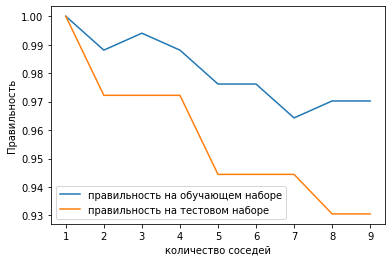

In [158]:
# 1.3 Построим график "Правильности" для разного числа соседей
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
  # строим модель
  clf = KNeighborsClassifier( n_neighbors = n_neighbors )
  clf.fit(Xtrain, Ytrain )
  # записываем правильность на обучающем наборе
  training_accuracy.append( clf.score(Xtrain, Ytrain) )
  # записываем правильность на тестовом наборе
  test_accuracy.append( clf.score(Xtest, Ytest) )

plt.plot( neighbors_settings, training_accuracy, label="правильность на обучающем наборе" )
plt.plot( neighbors_settings, test_accuracy, label="правильность на тестовом наборе" )
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
g = plt.legend()

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

Report for neighbors_model with MyGridSearch
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         7

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



<AxesSubplot:>

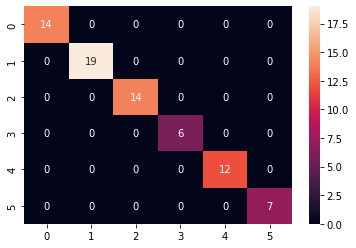

In [159]:
# Построение confusion matrix для лучшей выборки гиперпараметров
neighbors_model.set_params(**my_g_neigh_search.best_params)
neighbors_model.fit(Xtrain, Ytrain)
pred = neighbors_model.predict(Xtest)
print('Report for neighbors_model with MyGridSearch')
print(classification_report(Ytest, pred))
conf_mat = confusion_matrix(Ytest, pred)
sn.heatmap(conf_mat, annot=True, fmt="d")

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`



**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.